<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Ejercicio_Fuzzy_Final_enviar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estudiantes: Simón Jaramillo, Simón Gómez.

Profesor: Mario Góngora.

# Implementación de Fuzzy Systems para construir un algoritmo que pueda jugar Black Jack.


In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=b5267fc8e6b099caa38da1b1b9ef9f955780f0f80616064be722bf964c852360
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd
from random import seed
from random import random

## Construcción del Juego


La idea de este proyecto es poder crear un algoritmo que a través de lógica difusa pueda tomar decisiones referentes a un juego de Black Jack y a posteriori, pueda también utilizar referencias o experiencias derivadas del conteo de cartas.

A nivel básico, el juego de Black Jack consiste en obtener el número 21 a través de la combinación de valores numéricos de n cartas entregadas por el dealer, o, en su defecto, acercarse lo más posible al número.

Al inicio del juego, el dealer entrega al jugador 2 cartas boca arriba, sobre las cuales el mismo podría: pedir otra carta, plantarse, duplicar su apuesta o, en caso de tener un par de cartas iguales, separarlas y pedir una carta más para cada set...En paralelo, el dealer coloca una carta boca abajo y una boca arriba, y al finalizar el turno del jugador, este revela su carta boca abajo y pide o no según su necesidad; al finalizar el juego, aquel que tenga el resultado más cercano a 21 (Sin pasarse) ganará el juego y, por tanto, la apuesta.

Para guiar al jugador, se han creado guías que intentan explicar cuál sería la decisión óptima que debería de tomar alguien según el resultado que obtenga de su par de cartas, en concatenación de igual manera con la carta que el dealer tenga boca arriba.

Lo que pretendemos entonces es que el modelo nos diga, a través de lógica difuza, qué deberíamos de hacer, o la decisión que hemos de tomar a la hora de jugar con las cartas que tenemos en juego.

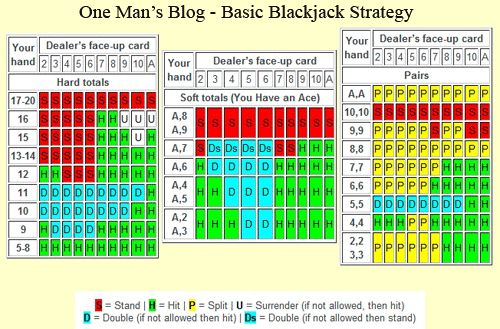

No obstante, el hecho mismo de que existan tantas posiblidades diferentes para tantos casos de sumas de cartas, implica que quizás haya demasiada complicación a la hora de desarrollar el problema con una heurística con altos niveles de precisión.

Por eso mismo, lo que pretendemos es generalizar las reglas, lo que sería de cierto modo hacerlas difusas, facilitando enormenete la toma de decisiones según unas variables lingüisticas que a groso modo serían los valores de la carta del dealer, y el valor de la suma de las cartas del jugador.

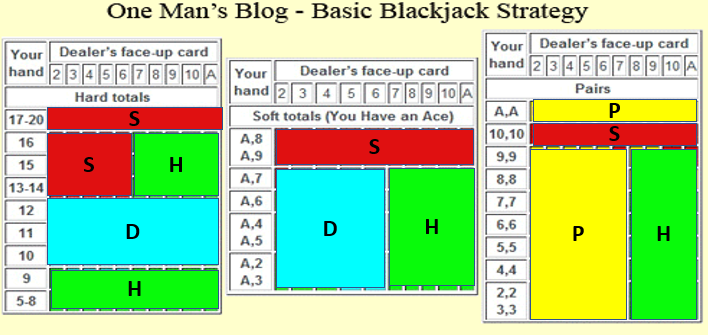

El juego general de BlackJack comienza con un monto de cartas compuesto por 6 barajas de 52 cartas, cada una con 4 palos diferentes, y números desde el 2 hasta el a (que en este caso valdrá 1 u 11 a discreción del jugador).

In [3]:
#Creamos una baraja inicial con 6 sets de 52 cartas.
elementos = [2,3,4,5,6,7,8,9,10,10,10,10,11]
baraja = elementos*4
setcroupier = baraja * 6
len(setcroupier)
copy=setcroupier.copy()

Con la copia de la baraja de juego, vamos a realizar una función que simule n iteraciones del juego, repartiendo dos cartas al dealer y al jugador, y retornando el tipo de juego (si es duro, si tiene un as o si es un par de cartas iguales), las cartas del jugador y el croupier y las cartas restantes que existan en la baraja total.

Además de esto, queda la regla de que si tras finalizar el juego, el valor de las cartas del dealer es menor que el de las del jugador, este puede tomar tantas cartas quiera para intentar mejorar o equiparar ese valor (aunque si se pasa de 21, claramente también pierde).

In [4]:
import random
#Como entradas, colocamos la baraja general, y el número de rondas que queremos simular.
def manos(rondas,copy):
  i = len(copy)
  count = 0
  t = 0
  try:
    #Se crea la mano del croupier n veces
    for i in range(rondas):
      n = random.randint(0,len(copy)-1)
      c1 = copy[n]
      copy.pop(n)
      #Si la carta es alta, bajamos uno a la cuenta, mientras que si es baja, aumentamos uno a la misma.
      if c1 in [10,11]:
        count -= 1
      elif c1 in [2,3,4,5,6]:
        count += 1
      n = random.randint(0,len(copy)-1)
      c2 = copy[n]
      copy.pop(n)
      if c2 in [10,11]:
        count -= 1
      elif c2 in [2,3,4,5,6]:
        count += 1
      mc = [c1,c2]
      #Se crea la mano del jugador n veces
      n = random.randint(0,len(copy)-1)
      c1 = copy[n]
      #Hay qué borrar el espacio elegido aleatoriamente, justo por el hecho de que las cartas deben de salir del mazo; no tiene sentido que se usen las mismas cartas que ya se usaron.
      copy.pop(n)
      if c1 in [10,11]:
        count -= 1
      elif c1 in [2,3,4,5,6]:
        count += 1
      n = random.randint(0,len(copy)-1)
      c2 = copy[n]
      copy.pop(n)
      if c2 in [10,11]:
        count -= 1
      elif c2 in [2,3,4,5,6]:
        count += 1
      mjug = [c1,c2]
      #Condición final; si las cartas del jugador tienen mayor valor que las del dealer.
      if sum(mjug) > sum(mc):
        n = random.randint(0,len(copy)-1)
        c3 = copy[n]
        copy.pop(n)
        if c3 in [10,11]:
          count -= 1
        elif c3 in [2,3,4,5,6]:
          count += 1
        mc.append(c3)
    #Identificamos el tipo de mano final
    if mjug[0] == 1 or mjug[1] == 1:
      t = 2
    elif mjug[0] == mjug[1]:
      t = 3
    else:
      t = 1
    #Sacamos el real count.
    tcount = count / (len(copy)/52)
    print(f"Tipo de mano: {t}")
    print(f"Conteo Relativo: {tcount}")
    print(f"Conteo: {count}")
    print(f"Mano del croupier: {mc}")
    print(f"Mano del jugador: {mjug}")
    print(f"Cartas Restantes en baraja: {len(copy)}")
    return(sum(mjug),mc[0],t)
  except:
    print("No se puede repartir más")

In [33]:
#Probamos la función.
r=manos(10,copy)

Tipo de mano: 1
Conteo Relativo: -2.3458646616541357
Conteo: -6
Mano del croupier: [3, 8, 4]
Mano del jugador: [8, 5]
Cartas Restantes en baraja: 133


## Variables Lingüísticas.

Como se dijo anteriormente, las variables que a nuestra discreción terminan siendo inciertas, es el valor de las cartas, lo que quiere decir que es ambiguo saber si un 18 es una mano suficientemente alta como para confiar en la misma y plantarse, o si el 12 es tan bajo que valdría la pena pedir más.

Para poder simular el problema, debemos de entender que las dos variables de entrada para el mismo serán el valor de la mano, y el valor de la carta boca arriba del dealer; sin embargo, como se pudo ver en el dibujo de arriba, hay 3 tipos de manos, por lo que igualmente puede haber 3 tipos de entrada, que se cruzarán básicamente con la propiedad de valor de mano boca arriba.

In [35]:
# Función del valor de la carta boca arriba.
mf_tcount = np.arange(0, 13, 1)
c_low = fuzz.trapmf(mf_tcount, [0, 3, 6, 8])
c_high = fuzz.trapmf(mf_tcount, [6, 7, 10, 11])
#Este one es el as, pero nada más.
c_one=fuzz.trimf(mf_tcount, [10,11,12])

#Función del valor de la mano para manos duras.
mf_value = np.arange(-1, 22, 1)
q_low = fuzz.trapmf(mf_value, [0, 2, 8, 10])
q_medium = fuzz.trapmf(mf_value, [8, 9, 10, 12])
q_high = fuzz.trapmf(mf_value, [11,13, 18, 19])
q_vhigh = fuzz.trapmf(mf_value, [18,19, 20, 21])

#Funcion para manos pares.
mf_equal = np.arange(0, 24, 1)
p_low = fuzz.trapmf(mf_equal, [0, 4, 16, 20])
p_high = fuzz.trimf(mf_equal, [18,20,22])
p_ace = fuzz.trimf(mf_equal, [21,22,23])

#Funcion para manos blandas.
mf_as = np.arange(0, 22, 1)
a_low = fuzz.trapmf(mf_as, [0, 2, 15, 17])
a_high = fuzz.trapmf(mf_as, [16, 18, 20,21])


De acuerdo a la generalización de las reglas que propusimos, construimos las diferentes gráficas fuzzy...La primera siendo las manos del dealer, siendo altas todas (a nuestro criterio) las que están por encima de 6; de resto, cada uno de los 3 tipos de manos se modelan según las entradas de las imágenes que hay arriba, separando en 4 grupos para manos duras, 2 grupos para manos blandas, y 3 para manos pares; recordemos que las salidas son de la forma n1*n2, por lo tanto sabiendo qeu n1 (cartas dealer) es un 2 constante, entonces se puede asumir que para duras habrá 8 posibilidades, para blandas habrá 4 y para pares habrá 6.

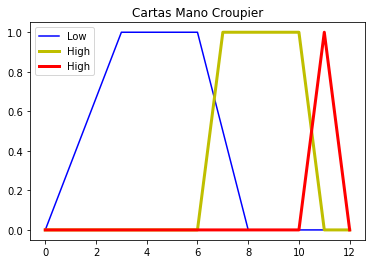

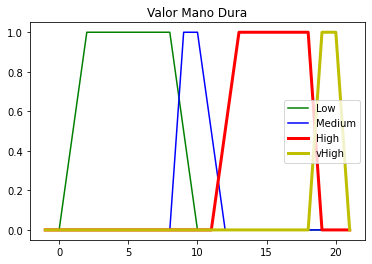

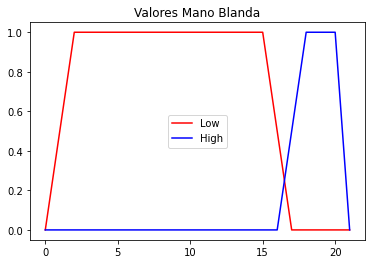

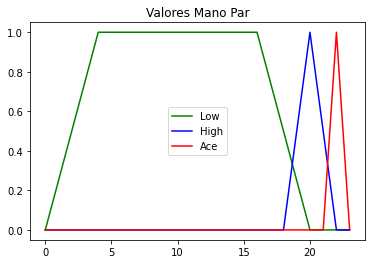

In [36]:
#Cartas Mano del Dealer
plt.plot(mf_tcount, c_low, 'b', linewidth=1.5, label='Low')
plt.plot(mf_tcount, c_high, 'y', linewidth=3, label='High')
plt.plot(mf_tcount, c_one, 'r', linewidth=3, label='High')
plt.title('Cartas Mano Croupier')
plt.legend()
plt.show()

#Cartas Mano Dura
plt.plot(mf_value, q_low, 'g', linewidth=1.5, label='Low')
plt.plot(mf_value, q_medium, 'b', linewidth=1.5, label='Medium')
plt.plot(mf_value, q_high, 'r', linewidth=3, label='High')
plt.plot(mf_value, q_vhigh, 'y', linewidth=3, label='vHigh')
plt.title('Valor Mano Dura')
plt.legend()
plt.show()

#Cartas Mano Blanda
plt.plot(mf_as, a_low, 'r', linewidth=1.5, label='Low')
plt.plot(mf_as, a_high, 'b', linewidth=1.5, label='High')
plt.title('Valores Mano Blanda')
plt.legend()
plt.show()

#Cartas Mano Par
plt.plot(mf_equal, p_low, 'g', linewidth=1.5, label='Low')
plt.plot(mf_equal, p_high, 'b', linewidth=1.5, label='High')
plt.plot(mf_equal, p_ace, 'r', linewidth=1.5, label='Ace')
plt.title('Valores Mano Par')
plt.legend()
plt.show()

## Función de Fuzzyficación.

Ahora fuzzyficamos las variables referentes a las cartas altas, medias y bajas, utilizando la función de membresía.

In [30]:
#----------------------------------
def Fuzzfymanodealer(qualVal):
  fzz_qual = np.zeros(3)
  fzz_qual[0] = fuzz.interp_membership(mf_tcount, c_low, qualVal)
  fzz_qual[1] = fuzz.interp_membership(mf_tcount, c_high, qualVal)
  fzz_qual[2] = fuzz.interp_membership(mf_tcount, c_one, qualVal)
  return fzz_qual

#----------------------------------
def Fuzzfymanosduras(svcVal):
  fzz_svc = np.zeros(4)
  fzz_svc[0] = fuzz.interp_membership(mf_value, q_low, svcVal)
  fzz_svc[1] = fuzz.interp_membership(mf_value, q_medium, svcVal)
  fzz_svc[2] = fuzz.interp_membership(mf_value, q_high, svcVal)
  fzz_svc[3] = fuzz.interp_membership(mf_value, q_vhigh, svcVal)
  return fzz_svc

#----------------------------------
def Fuzzfyblandas(EqVal):
  fzz_eq = np.zeros(2)
  fzz_eq[0] = fuzz.interp_membership(mf_as, a_low, EqVal)
  fzz_eq[1] = fuzz.interp_membership(mf_as, a_high, EqVal)
  return fzz_eq

#----------------------------------
def FuzzfyEq(EqVal):
  fzz_eq = np.zeros(3)
  fzz_eq[0] = fuzz.interp_membership(mf_equal, p_low, EqVal)
  fzz_eq[1] = fuzz.interp_membership(mf_equal, p_high, EqVal) 
  fzz_eq[2] = fuzz.interp_membership(mf_equal, p_ace, EqVal)
  return fzz_eq

## Base de conocimiento.

Ya que tenemos las variables fuzzyficadas,  es momento de desarrollar la función que nos arroje las diferentes salidas deseadas, que en este caso será la decisión de qué hacer con nuestro par de cartas.

No obstante, como estas decisiones dependerán de igual manera del tipo de mano que tengamos, la función de entrada deberá de tener un parámetro más que en este caso será la mano (tipo 1 siendo dura, tipo 2 blanda, y tipo 3 una mano par)...A continuación repetimos la imagen que debería ser nuestra salida.

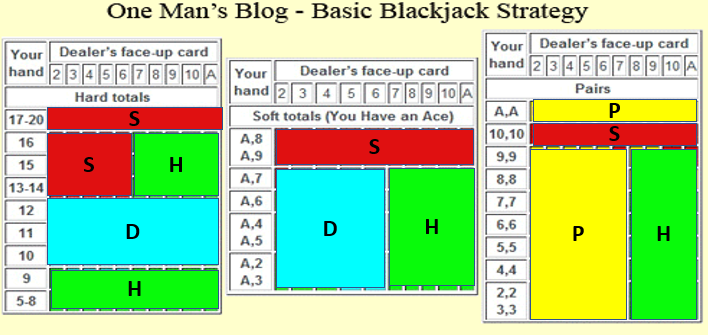

In [19]:
def evalRules(tipo,fuzzedmanodura, fuzzedmanodealer,fuzzedEq,fuzzedblandas):
  outVarS = np.zeros(4)
  #Mano dura.
  #Para este caso, la salida 0 hará referencia a STAND o mantenerse, la 1 a doblar la apuesta, la 2 a pedir otra carta y la 3 a partir el mazo, en este caso solo para manos pares.
  if tipo==1:
    #Para explicar un ejemplo, este caso dice que para manos duras, el modelo debería quedarse plantado si su mano es muy alta, o si es alta y la carta del dealer es baja.
    outVarS[0] = max(outVarS[0],max(min(fuzzedmanodura[3],max(fuzzedmanodealer[0],fuzzedmanodealer[1],fuzzedmanodealer[2])),min(fuzzedmanodura[2],fuzzedmanodealer[0]))) #Regla uno: Stand
    outVarS[1] = max(outVarS[1], min(fuzzedmanodura[1],max(fuzzedmanodealer[0],fuzzedmanodealer[1],fuzzedmanodealer[2]))) #Regla dos: Double
    outVarS[2] = max(outVarS[2], max(min(fuzzedmanodura[2], max(fuzzedmanodealer[1],fuzzedmanodealer[2])),min(fuzzedmanodura[0],max(fuzzedmanodealer[0],fuzzedmanodealer[1],fuzzedmanodealer[2])))) #Regla tres: HIT
    outVarS[3] = 0 #Regla cuatro: SPLIT
  #Mano blanda.
  elif tipo==2:
    outVarS[0] = max(outVarS[0],min(fuzzedblandas[1],max(fuzzedmanodealer[0],fuzzedmanodealer[1],fuzzedmanodealer[2]))) #Regla uno: Stand
    outVarS[1] = max(outVarS[1], min(fuzzedblandas[0],fuzzedmanodealer[0])) #Regla dos: Double
    outVarS[2] = max(outVarS[2], min(fuzzedblandas[0],max(fuzzedmanodealer[1],fuzzedmanodealer[2]))) #Regla tres: HIT
    outVarS[3] = 0 #Regla cuatro: SPLIT
  #Mano par.
  else:
    outVarS[0] = max(outVarS[0],min(fuzzedEq[1],max(fuzzedmanodealer[0],fuzzedmanodealer[1],fuzzedmanodealer[2]))) #Regla uno: Stand
    outVarS[1] = 0 #Regla dos: Double
    outVarS[2] = max(outVarS[2], min(fuzzedEq[0],max(fuzzedmanodealer[1],fuzzedmanodealer[2]))) #Regla tres: HIT
    outVarS[3] = max(outVarS[3],max(min(fuzzedEq[2],max(fuzzedmanodealer[0],fuzzedmanodealer[1],fuzzedmanodealer[2])),min(fuzzedEq[0],fuzzedmanodealer[0]))) #Regla cuatro: SPLIT    
  return outVarS

Como nuestro problema no tiene una salida fuzzyficada, sino que debe de arrojar únicamente una decisión marcada por, en nuestro caso, el máximo valor de activación; por ello, la función de salida nos arroja los valores de los vectores de activación (en este caso de 1 a 4) y nos trae el mayor de todos, lo que de cierto modo significa aquella decisión que se tomó con más confianza.

En problemas fuzzy, es normal que para una entrada se activen varias salidas, y por eso tenemos qué garantizar que se escoja aquella salida con más peso o en este caso, mayor porcentaje.

In [20]:
def salida(vector,suma):
  maxi=max(vector)
  if vector[0] !=0 and vector[0]==maxi:
    x='STAND'
  elif vector[1] !=0 and vector[1]==maxi:
    x='DOUBLE'
  elif vector[2] !=0  and vector[2]==maxi:
    x='HIT'
  elif vector[3] !=0 and vector[3]==maxi:
    x='SPLIT'
  elif suma ==21:
    x='Gana'
  return x

## Salida y Pruebas

Para la entrada de la función, bastará con ingresar la suma de las manos, la carta boca arriba del dealer y el tipo de mano; con esa información bastará para  que el modelo desarrolle toda su lógica difusa.

In [23]:
def execFzzedRules(suma,manodealer,tipo):
  # Queremos comprobar los porcentajes de activación.
  Fmanodealer = Fuzzfymanodealer(manodealer)
  #print(Fmanodealer)
  Fmanodura = Fuzzfymanosduras(suma)
  #print(Fmanodura)
  fzzfyEq=FuzzfyEq(suma)
  #print(fzzfyEq)
  fzzfyAs=Fuzzfyblandas(suma)
  #print(fzzfyAs)
  # Se evalúan las reglas.
  EvaledRs = evalRules(tipo,Fmanodura, Fmanodealer,fzzfyEq,fzzfyAs)
  #print(EvaledRs)
  return EvaledRs

A continuación vamos a probar que el código funcione con todos los tipos de mano y decisiones posibles, y como se puede ver, en efecto la máquina toma decisiones basadas en la lógica difusa que implica el tener manos "altas" o "bajas".

In [34]:
# 1. Input numeric values and use fuzzification route.
x =execFzzedRules(r[0],r[1],r[2])
salida(x,r[0])

'STAND'

In [ ]:
x =execFzzedRules(16,3,2)
salida(x,16)

'DOUBLE'

In [ ]:
x =execFzzedRules(8,3,3)
salida(x,8)

'SPLIT'

In [ ]:
x =execFzzedRules(20,9,1)
salida(x,20)

'STAND'

In [ ]:
x =execFzzedRules(21,4,1)
salida(x,21)

'Gana'

## Conclusiones y Anotaciones

Lo que se hizo en este trabajo, de manera resumida, fue:

1.   Se identificó el problema, siendo este un modelo que pudiera tomar decisiones para el juego de 21 o Black Jack; entendiendo también los factores difusos o de incertidumbre como lo pueden ser (en caso de que el programa tuviera una cámara que leyera la pista) la resolución de la cámara para detectar las cartas (aleatorio), o el hecho de que las detectara mal por solapamiento o por falta de entrenamiento (epistémico).
2.   Se identificó la salida que necesitábamos; en este caso, siendo una decisión activada por porcentajes (lo cuál implica que al no necesitar "numerizar", era innecesario el proceso de defuzzyficación). Un tema interesante es que la salida tenía múltiples opciones en matrices de hasta 8x8, pero por facilidad y lógica del problema, decidimos convertir esa matriz en un sistema mucho más abstracto, con menos posibilidades.
3.   Se crearon las variables lingüísticas, una por tipo de mano, y una para la mano del croupier, todas estas relacionadas con el término "Alto" y "Bajo" que es sumamente subjetivo para un contador de cartas.
4.   Se fuzzyficaron las variables, se construyeron los modelos según una guía que ya se presentó arriba, y de desarrolló una función que arroja aquel trozo de la matriz cuyo porcentaje de activación sea el más alto.
5.   Se probó el modelo y se obtuvieron resultados muy en línea con lo que se pretendió y lo que se programó.




In [ ]:
mf_count = np.arange(-30, 30, 1)
q_vlow = fuzz.trapmf(mf_count, [-30, -29, -10, 8])
q_low = fuzz.trapmf(mf_count, [-11, -9, -1, 0])
q_zero = fuzz.trimf(mf_count, [-1, 0, 1])
q_high = fuzz.trapmf(mf_count, [0,1, 9, 11])
q_vhigh = fuzz.trapmf(mf_count, [8,10, 29, 30])

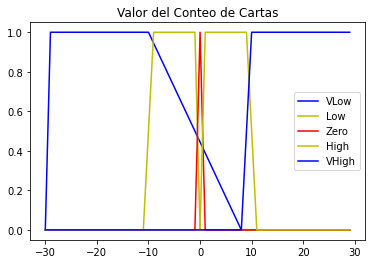

In [ ]:
plt.plot(mf_count, q_vlow, 'b', linewidth=1.5, label='VLow')
plt.plot(mf_count, q_low, 'y', linewidth=1.5, label='Low')
plt.plot(mf_count, q_zero, 'r', linewidth=1.5, label='Zero')
plt.plot(mf_count, q_high, 'y', linewidth=1.5, label='High')
plt.plot(mf_count, q_vhigh, 'b', linewidth=1.5, label='VHigh')
plt.title('Valor del Conteo de Cartas')
plt.legend()
plt.show()


En algún momento comentamos el tema del conteo de cartas; este básicamente consiste en llevar una cuenta acumulada +1 por cada carta baja que salga (en nuestros casos, del 2 al 6) y de -1 por cada carta alta (del 10 al as)...Para un modelo más refinado, podríamos hacer que en caso de que la salida del modelo sea un HIT o tomar más cartas, entre nuevamente a otro modelo difuso que en este caso trate de responder a esa variable incierta de qué tal está el conteo (lo que es alto para algunos, puede que no lo sea para otros), haciendo así que se tome otra decisión referente a si realmente debería o no pedir tal cartas, por ejemplo:

X persona ha obtenido un 15, y va a pedir; no obstante, la cuenta está en +15, lo que quiere decir que han salido 15 cartas bajas más que cartas altas, por lo que en la baraja hay muchísimas más probabilidades de que al pedir, salga un número 10, lo cuál haría que si se pide, se pierda inmediatamente...Una entrada de más puede implicar una salida fuzzy para un modelo fuzzy nuevamente, y esto sería un aprendizaje muy interesante que podríamos desarrollar en el momento en que tengamos más tiempo para trabajar en el modelo.

Del trabajo se pueden desprender varias conclusiones interesantes:

*   Aunque bien pudimos haber hecho este problema utilizando métodos heurísticos, lo más probable es que la construcción del modelo en tal caso hubiera tardado 5 o 10 veces más que la construcción de este, pues la bondad del mismo radica en que al convertir las variables en lingüisticas, el razonamiento y la aproximación se vuelven muchísimo más orgánicos, a diferencia de un sistema rígido lleno de ifs y matrices.
Muchas veces solemos pensar que los modelos tienen que ser perfectos, cuando quizás lo que realmente necesitamos es que los mismos respondan de buena manera...Lo que quiere decir que no es importante hacerlo bello, mientras se haga útil y funcional, y acá, creemos, radica uno de los puntos más importantes e interesantes de toda la teoría difusa.
*   Otro aprendizaje que podemos obtener tiene que ver con lo importante que es entender un problema, y lo fácil que es modelarlo una vez se tenga claridad del fondo del asunto...De cierto modo, vale mucho la pena tomarse un tiempo considerable intentando descifrar variables y requerimentos antes de empezar a trabajar con las mismas, pues un buen modelo será posible en gran medida, si se tiene una buena comprensión del problema por delante, pues de otro modo la información está cortada o las cosas que se piden pueden estar erróneas.
*   Como colofón, los sistemas difusos son una herramienta muy poderosa cuando queremos desarrollar problemas cuyas variables son vagas o difícilmente representables a traves de sistemas numéricos convencionales; el desarrollo de actividades utilizando fuzzy systems ayuda no solo a entender en mayor medida el desarrollo de teorías complejas desde la lógica lingüística, sino que además promueve el desarrollo de pensamiento horizontal, entendiendo a fondo los problemas y planteando soluciones mucho más suaves y mucho menos rígidas que las que se pueden obtener naturalmente utilizando otros procesos de modelado como los de Machine Learning.
Para este problema en particular también fuimos capaces de entender el poder que tenían los fuzzy systems para la toma de decisiones no numéricas, y esto es una ganancia tremende a la hora de poder desarrollar algunos problemas (particularmente de teoría de juegos) que antes se nos escapan ya fuera por su complejidad o por la dificultad que implicaba programarlos al detalle.


